In [43]:
# Import packages
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
test_df = pd.read_json('/users/kayan/Desktop/ADS-599-Capstone-Project/raw_data/test.json')
test_df.head()

,document,full_text,tokens,trailing_whitespace
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal..."


In [11]:
train_df = pd.read_json('/users/kayan/Desktop/ADS-599-Capstone-Project/raw_data/train.json')
train_df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [13]:
sample_sub = pd.read_csv('/users/kayan/Desktop/ADS-599-Capstone-Project/raw_data/sample_submission.csv')
sample_sub.head()

,row_id,document,token,label
0,0,7,9,B-NAME_STUDENT
1,1,7,10,I-NAME_STUDENT
2,2,7,482,B-NAME_STUDENT
3,3,7,483,I-NAME_STUDENT
4,4,7,741,B-NAME_STUDENT


## EDA-Jiaqi

### test_df

In [15]:
test_df.shape
test_df.info()
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             10 non-null     int64 
 1   full_text            10 non-null     object
 2   tokens               10 non-null     object
 3   trailing_whitespace  10 non-null     object
 4   full_text_length     10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 480.0+ bytes


,document,full_text_length
count,10.000000,10.000000
mean,62.700000,3873.000000
std,46.142412,2074.414295
min,7.000000,1252.000000
25%,17.000000,2717.750000
50%,71.000000,3341.000000
75%,101.250000,4816.500000
max,123.000000,8397.000000


In [19]:
# Most commin tokens
tokens_list = [token for sublist in test_df['tokens'] for token in sublist]
token_counts = Counter(tokens_list)
most_common_tokens = token_counts.most_common(10)
print(most_common_tokens)

[('\xa0', 853), ('the', 492), (',', 305), ('\n\n', 263), ('.', 261), ('to', 239), (' ', 212), ('of', 209), ('and', 178), ('a', 135)]


In [33]:
# token frequency by document
token_freq_by_doc = test_df['tokens'].apply(Counter)
token_freq_by_doc.head()

0    {'Design': 3, 'Thinking': 3, 'for': 7, 'innova...
1    {'Diego': 2, 'Estrada': 2, '

': 16, 'Design':...
2    {'Reporting': 1, 'process': 6, '

': 52, 'by':...
3    {'Design': 1, 'Thinking': 1, 'for': 12, 'Innov...
4    {'Assignment': 1, ':': 5, '  ': 52, 'Visualiza...
Name: tokens, dtype: object

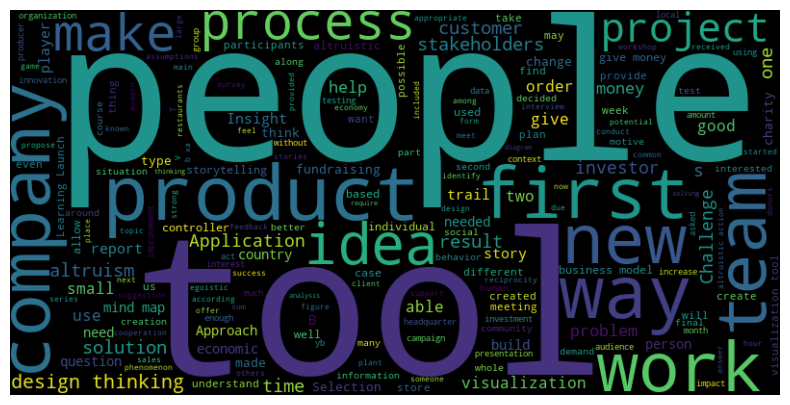

In [26]:
# Wordcloud for test_df
all_tokens = ' '.join([token for sublist in test_df['tokens'] for token in sublist])
wordcloud = WordCloud(width=800, height=400).generate(all_tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### train_df

In [27]:
train_df.shape
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
dtypes: int64(1), object(4)
memory usage: 319.1+ KB


,document
count,6807.000000
mean,14739.782283
std,4920.715769
min,7.000000
25%,11061.500000
50%,14818.000000
75%,18974.000000
max,22687.000000


<AxesSubplot: >

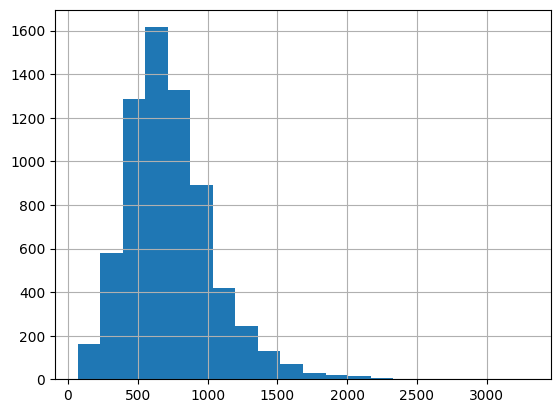

In [28]:
train_df['token_length'] = train_df['tokens'].apply(len)
train_df['token_length'].hist(bins=20)

In [29]:
# most common tokens
tokens_list = [token for sublist in train_df['tokens'] for token in sublist]
token_counts = Counter(tokens_list)
most_common_tokens = token_counts.most_common(10)
print(most_common_tokens)

[('the', 236386), (' ', 221248), ('.', 172786), ('to', 161026), (',', 152951), ('and', 136079), ('of', 108775), ('\n\n', 104136), ('a', 92086), ('in', 66727)]


In [32]:
# token frequency by document
token_freq_by_doc = train_df['tokens'].apply(Counter)
token_freq_by_doc.head()

0    {'Design': 3, 'Thinking': 3, 'for': 7, 'innova...
1    {'Diego': 2, 'Estrada': 2, '

': 16, 'Design':...
2    {'Reporting': 1, 'process': 6, '

': 52, 'by':...
3    {'Design': 1, 'Thinking': 1, 'for': 12, 'Innov...
4    {'Assignment': 1, ':': 5, '  ': 52, 'Visualiza...
Name: tokens, dtype: object

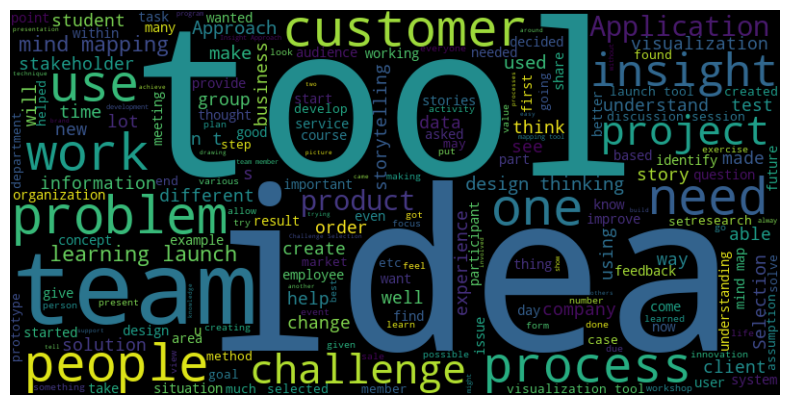

In [34]:
all_tokens = ' '.join([token for sublist in train_df['tokens'] for token in sublist])
wordcloud = WordCloud(width=800, height=400).generate(all_tokens)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### sample_sub

In [36]:
label_freq_by_doc = sample_sub.groupby('document')['label'].value_counts()
label_freq_by_doc.head()

document  label         
7         B-NAME_STUDENT    3
          I-NAME_STUDENT    3
10        B-NAME_STUDENT    2
          I-NAME_STUDENT    2
16        B-NAME_STUDENT    1
Name: count, dtype: int64